# Лабораторная работа 1
### Выполнил: студент 136 группы из РГРТУ Алешин А.И.

Добро пожаловать в лабораторную работу! 
Оформите ваше решение контеста Kaggle в соответствии с этим шаблоном. Ваша задача - показать проверяющим ход ваших рассуждений, поэтому советуем писать много комментариев к коду и приводить комментарии к логике на каждом этапе в текстовых ячейках. 
Где необходимо, используйте графики для большей наглядности.

### EDA (исследовательский анализ данных)

В этом разделе вам необходимо провести анализ вашего датасета, интерпретировать признаки, выяснить их значимость и исследовать зависимости между ними.

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('train.csv')
df1 

,id,carat,cut,color,clarity,depth,table,x,y,z,theta1,theta2,price
0,17044,0.28,Ideal,F,VVS2,61.6,55.0,4.22,4.26,2.61,5,5,612
1,30625,0.28,Ideal,I,VS1,62.5,54.0,4.18,4.23,2.63,5,6,448
2,17043,0.28,'Very Good',F,IF,62.2,55.0,4.23,4.26,NaN,5,7,612
3,37947,0.28,'Very Good',E,VS2,63.0,59.0,4.11,4.15,2.60,5,8,487
4,30626,0.28,Ideal,I,VS1,62.4,54.0,4.18,4.19,2.61,5,9,448
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40448,25132,2.02,Premium,J,VS2,62.0,59.0,8.06,8.08,5.00,27,23,13687
40449,25135,2.02,'Very Good',J,VS2,59.3,60.0,8.28,8.34,4.93,27,24,13693
40450,27141,2.02,'Very Good',I,SI1,60.4,58.0,8.20,8.16,4.94,27,25,17357
40451,24778,2.02,Good,H,SI2,59.0,61.0,8.26,8.31,4.89,27,27,13144


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40453 entries, 0 to 40452
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40453 non-null  int64  
 1   carat    40453 non-null  float64
 2   cut      40453 non-null  object 
 3   color    40453 non-null  object 
 4   clarity  40389 non-null  object 
 5   depth    40396 non-null  float64
 6   table    40453 non-null  float64
 7   x        40405 non-null  float64
 8   y        40393 non-null  float64
 9   z        40411 non-null  float64
 10  theta1   40453 non-null  int64  
 11  theta2   40453 non-null  int64  
 12  price    40453 non-null  int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 4.0+ MB


In [4]:
df1 = df1.drop(['id'],axis = 1) 

In [5]:
df1.isnull().sum() 

carat       0
cut         0
color       0
clarity    64
depth      57
table       0
x          48
y          60
z          42
theta1      0
theta2      0
price       0
dtype: int64

In [6]:
df1 = df1.dropna(axis = 0, subset = ['clarity','depth','x','y','z'])  

После удаления неопределенных значений посмотрим на числовые признаки корреляцию пока не смотрим потому что при наличии выбросов будет необъективная оценка

<AxesSubplot:xlabel='carat', ylabel='price'>

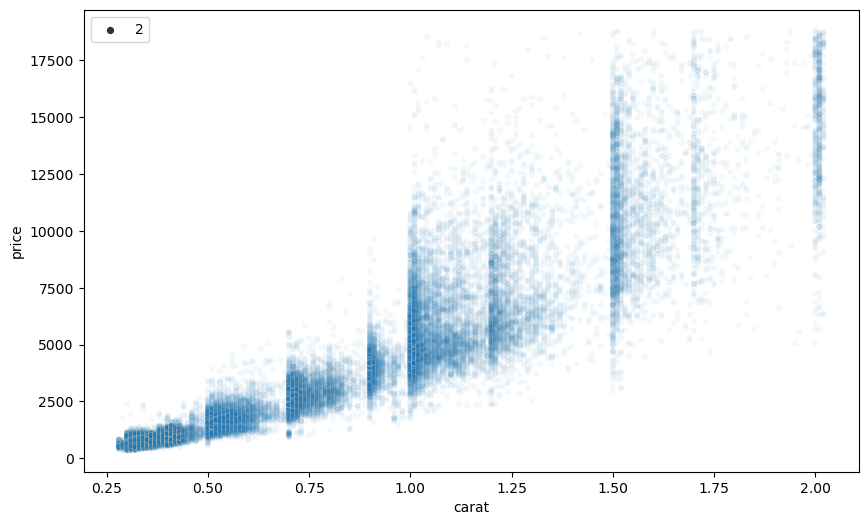

In [7]:
# наблюдаем практически линейную зависимость признаков 
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'carat', y = 'price',data = df1,size = 2,alpha = 0.05)

<AxesSubplot:xlabel='x', ylabel='price'>

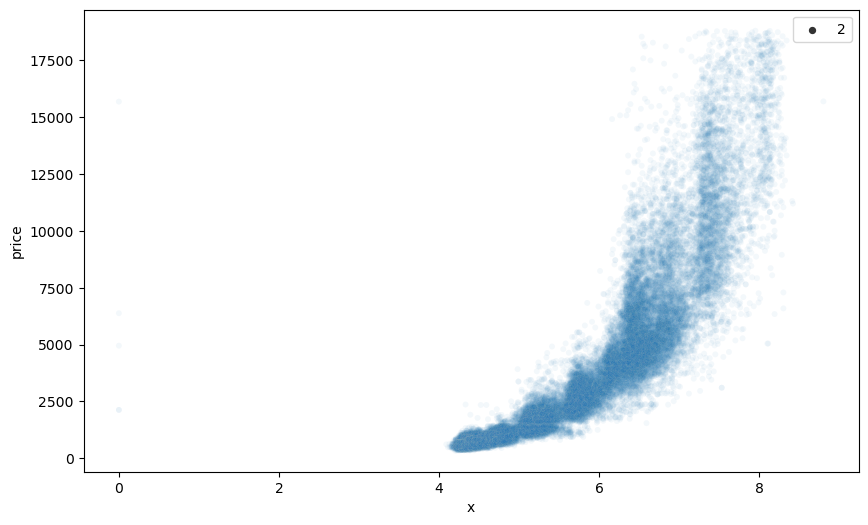

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'x', y = 'price',data = df1,size = 2,alpha = 0.05)

<AxesSubplot:xlabel='y', ylabel='price'>

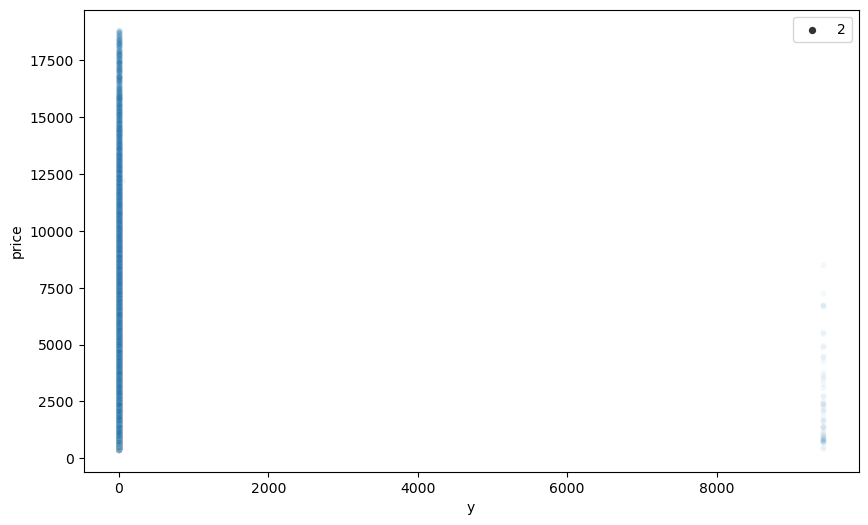

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'y', y = 'price',data = df1,size = 2,alpha = 0.05)

<AxesSubplot:xlabel='z', ylabel='price'>

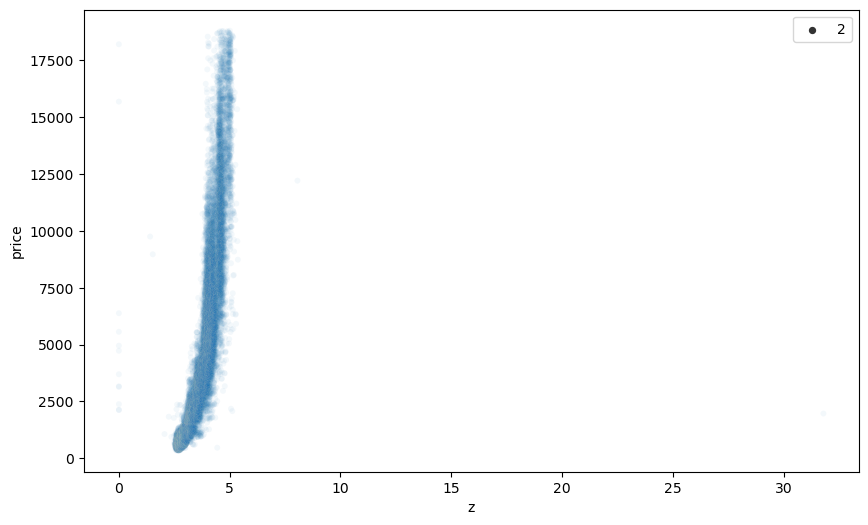

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'z', y = 'price',data = df1,size = 2,alpha = 0.05)

<AxesSubplot:xlabel='table', ylabel='price'>

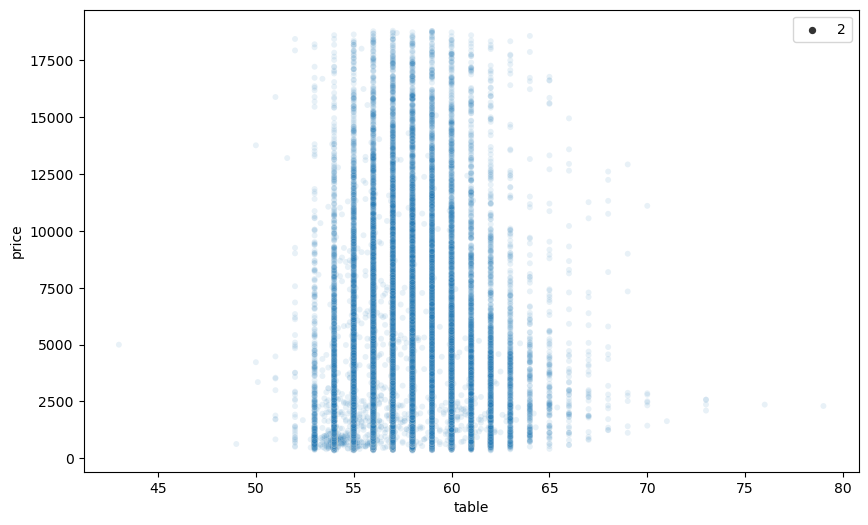

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'table', y = 'price',data = df1,size = 2,alpha = 0.1)

<AxesSubplot:xlabel='depth', ylabel='price'>

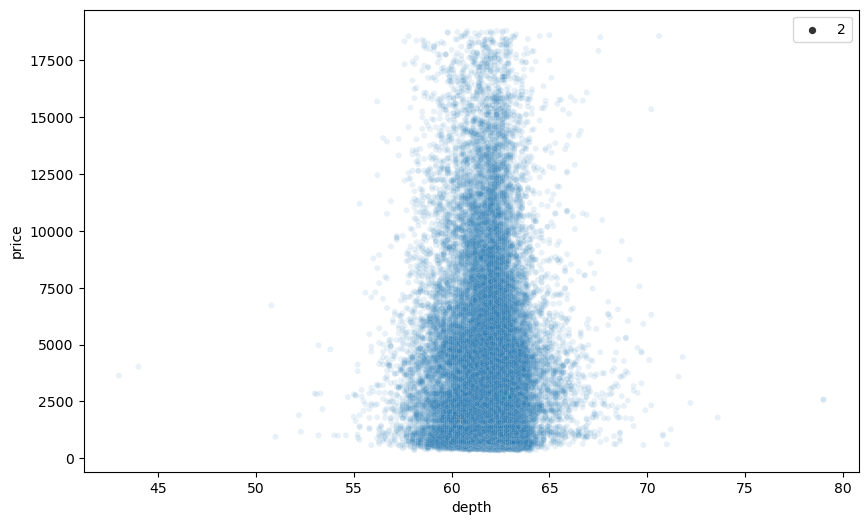

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'depth', y = 'price',data = df1,size = 2,alpha = 0.1)

<AxesSubplot:xlabel='theta1', ylabel='price'>

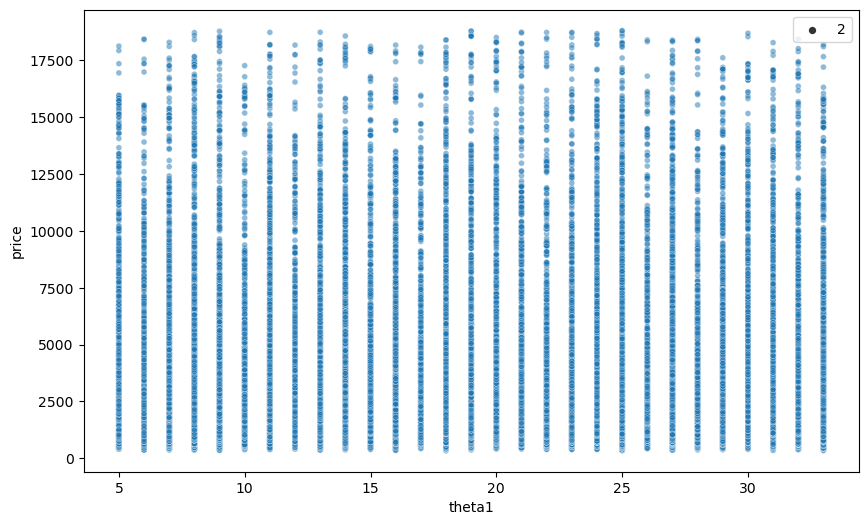

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'theta1', y = 'price',data = df1,size = 2,alpha = 0.5)

<AxesSubplot:xlabel='theta1', ylabel='price'>

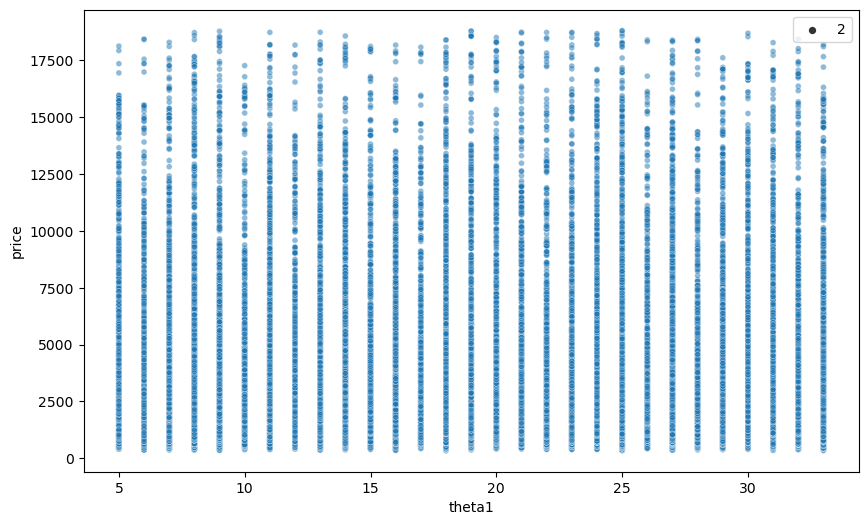

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'theta1', y = 'price',data = df1,size = 2,alpha = 0.5)

выводы по графикам 
x,y,z имеют выбросы которые мешают оценить полноту картины 
depth и table имеют нормальное распределение 
theta1 и theta2 имеют случайное распределение 

удалим выбросы x,y,z

In [15]:
df1 = df1[(df1['y'] < 30) & (df1['y'] > 3)]
df1 = df1[(df1['x'] > 0.1)]
df1 = df1[(df1['z'] > 2.4) & (df1['z'] < 8)]

<AxesSubplot:xlabel='x', ylabel='price'>

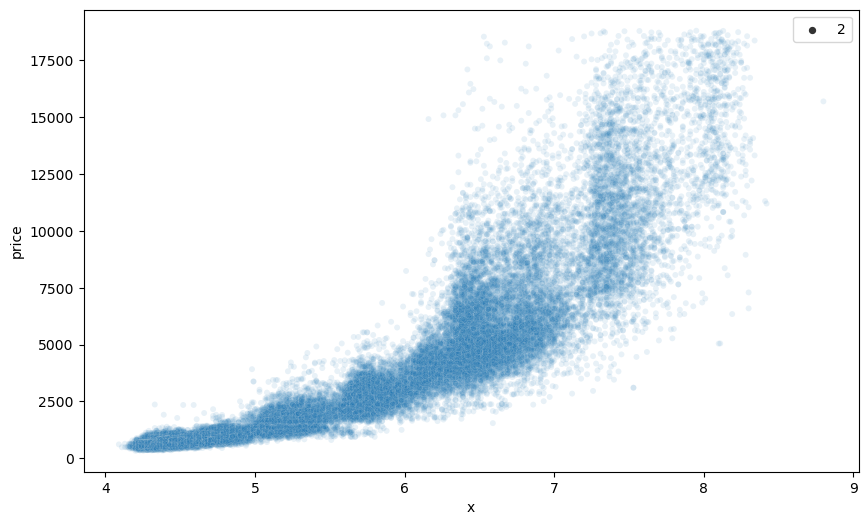

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'x', y = 'price',data = df1,size = 2,alpha = 0.1)

<AxesSubplot:xlabel='y', ylabel='price'>

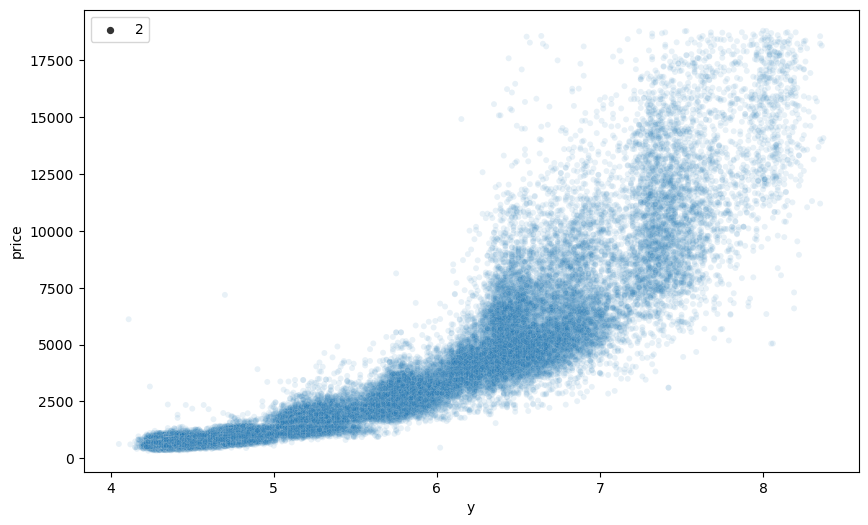

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'y', y = 'price',data = df1,size = 2,alpha = 0.1)

<AxesSubplot:xlabel='z', ylabel='price'>

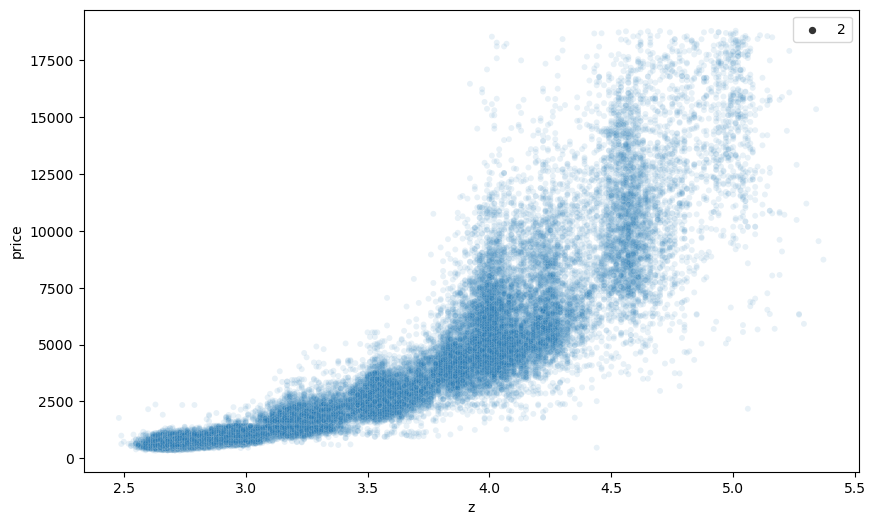

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'z', y = 'price',data = df1,size = 2,alpha = 0.1)

Видим одинаковую природу и очень похожий рисунок

In [19]:
df1.corr() # theta1 и theta2 ни с чем некоррилируют их можно удалить 

,carat,depth,table,x,y,z,theta1,theta2,price
carat,1.000000,0.029969,0.185564,0.983061,0.981949,0.982167,0.003156,0.000066,0.911039
depth,0.029969,1.000000,-0.286774,-0.028392,-0.031985,0.101418,-0.001771,-0.003117,-0.007806
table,0.185564,-0.286774,1.000000,0.198720,0.191816,0.156507,0.010634,-0.003530,0.119749
x,0.983061,-0.028392,0.198720,1.000000,0.998369,0.990509,0.004350,0.000357,0.876111
y,0.981949,-0.031985,0.191816,0.998369,1.000000,0.990077,0.004289,0.000670,0.877713
z,0.982167,0.101418,0.156507,0.990509,0.990077,1.000000,0.004207,0.000167,0.871545
theta1,0.003156,-0.001771,0.010634,0.004350,0.004289,0.004207,1.000000,0.004814,0.004653
theta2,0.000066,-0.003117,-0.003530,0.000357,0.000670,0.000167,0.004814,1.000000,-0.000840
price,0.911039,-0.007806,0.119749,0.876111,0.877713,0.871545,0.004653,-0.000840,1.000000


In [20]:
df1 = pd.get_dummies(df1,drop_first=True) # и заодно преобразуем категориальные переменные
df1 = df1.drop(['theta1','theta2'],axis = 1)

In [21]:
X13 = df1.drop(['price'],axis = 1) 
y13 = df1['price']
X13

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.28,61.6,55.0,4.22,4.26,2.61,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0.28,62.5,54.0,4.18,4.23,2.63,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
3,0.28,63.0,59.0,4.11,4.15,2.60,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.28,62.4,54.0,4.18,4.19,2.61,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
5,0.28,60.4,59.0,4.22,4.26,2.56,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40448,2.02,62.0,59.0,8.06,8.08,5.00,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
40449,2.02,59.3,60.0,8.28,8.34,4.93,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
40450,2.02,60.4,58.0,8.20,8.16,4.94,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
40451,2.02,59.0,61.0,8.26,8.31,4.89,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0


### Model & training (Выбор модели и её обучение)

В этом разделе описываете модель и ставите эксперименты по обучению.

Если вы ставили много экспериментов, приведите их в хронологическом порядке чтобы мы увидели эволюцию ваших рассуждений.

#### Эксперимент 1

Далее мы будем обучаться с помощью линейной регресси с использования полиномиальных фичей то есть наделаем много признаков которые будут улавливать не только линейные зависимости но нужно быть аккуратным модель легко переобучить. с помощью мин макс скелера трансформируем данные которые будут от 0 где 0 самое маленькое число в столбце до единицы где 1 самое большое понятия не имею что тут можно еще описать.

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X13, y13, test_size=0.2, random_state=101) # сид 101(почти 5) доля выборки 20 процентов
 
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

from sklearn.preprocessing import MinMaxScaler
absss = MinMaxScaler()
X_train = absss.fit_transform(X_train)
X_test = absss.transform(X_test)

from sklearn.linear_model import LinearRegression
obych = LinearRegression()
obych.fit(X_train,y_train) # обучаем 


LinearRegression()

#### Эксперимент 2

In [23]:
# some code and comments

#### Эксперимент 3

In [24]:
# some code and comments

### Evaluation (оценка качества модели)

В этом разделе проводите оценку качества вашей итоговой модели. 

In [25]:
from sklearn.metrics import mean_absolute_error
y_pred = obych.predict(X_test)

mean_absolute_error(y_test,y_pred)

359.9502101423754

In [26]:
y_pred1 = obych.predict(X_train)
mean_absolute_error(y_train,y_pred1)

362.2792053659704

проверили качество на обучающей и тестовой модели в принципе для начала было неплохо

#  Эксперемент 2 (продолжаем)

в целях уменьшения просмотренного графики не будут повторяться будут новые (красивые наверно и полезные желательно)

In [27]:
df2 = pd.read_csv('train.csv')
df2 = df2.drop(['id'],axis = 1)
df2 = pd.get_dummies(df2,drop_first=True) 
df2 = df2.drop(['theta1','theta2'],axis = 1)

In [28]:
df2 = df2[(df2['y'] < 30) & (df2['y'] > 3)]
df2 = df2[(df2['x'] > 0.1)]
df2 = df2[(df2['z'] > 2.4) & (df2['z'] < 8)]

In [29]:
df2

,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.28,61.6,55.0,4.22,4.26,2.61,612,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0.28,62.5,54.0,4.18,4.23,2.63,448,0,0,1,...,0,1,0,0,0,0,1,0,0,0
3,0.28,63.0,59.0,4.11,4.15,2.60,487,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.28,62.4,54.0,4.18,4.19,2.61,448,0,0,1,...,0,1,0,0,0,0,1,0,0,0
5,0.28,60.4,59.0,4.22,4.26,2.56,487,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40448,2.02,62.0,59.0,8.06,8.08,5.00,13687,0,0,0,...,0,0,1,0,0,0,0,1,0,0
40449,2.02,59.3,60.0,8.28,8.34,4.93,13693,0,0,0,...,0,0,1,0,0,0,0,1,0,0
40450,2.02,60.4,58.0,8.20,8.16,4.94,17357,0,0,0,...,0,1,0,0,1,0,0,0,0,0
40451,2.02,59.0,61.0,8.26,8.31,4.89,13144,0,1,0,...,1,0,0,0,0,1,0,0,0,0


Тут мне пришла идея прологарифмировать некоторые элементы выборки чтобы они были похожи на нормальный закон распределения ну и под мою горячуюю руку попало все.

<AxesSubplot:xlabel='price', ylabel='Count'>

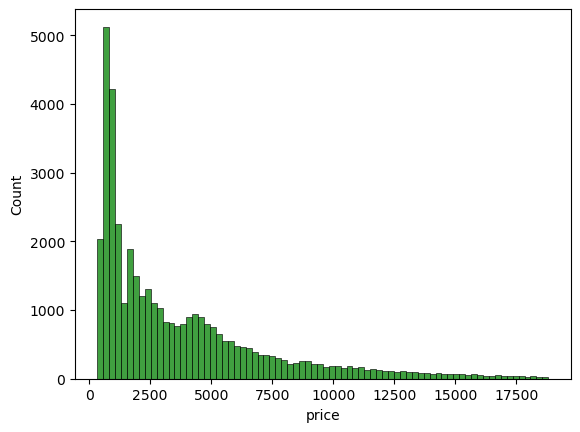

In [30]:
sns.histplot(data = df2,x = 'price',color = 'green') # логнормаьный закон распределения

<AxesSubplot:xlabel='carat', ylabel='Count'>

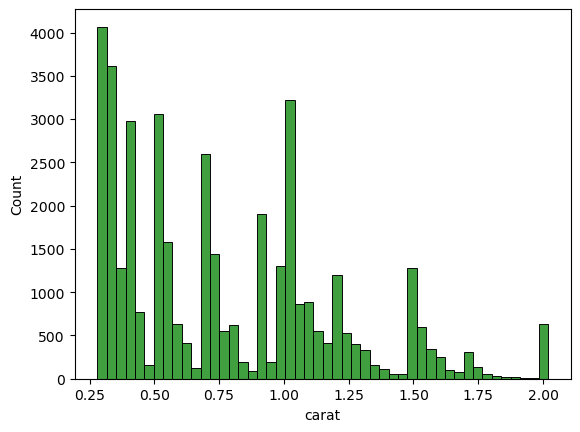

In [31]:
sns.histplot(data = df2,x = 'carat',color = 'green') # логнормаьный закон распределения ступенчато 

<AxesSubplot:xlabel='x', ylabel='Count'>

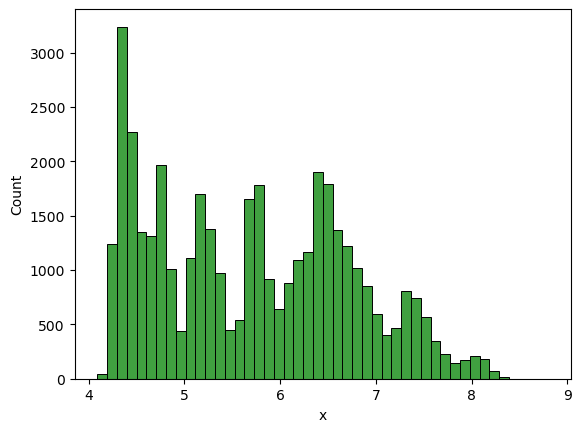

In [32]:
sns.histplot(data = df2,x = 'x',color = 'green') # и т д

In [33]:
X = df2.drop(['price'],axis = 1)
y = np.log(df2['price'])
X.carat = np.log(X.carat)
X.x = np.log(X.x)
X.y = np.log(X.y)
X.z = np.log(X.z)

<AxesSubplot:xlabel='price', ylabel='Count'>

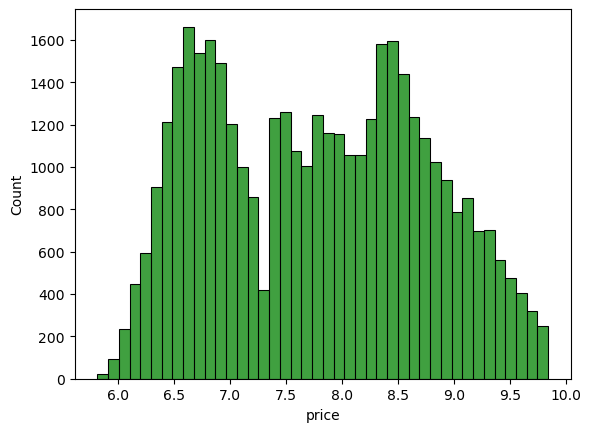

In [34]:
sns.histplot(x = y,color = 'green') # что то получше в плане распределения 

<AxesSubplot:xlabel='carat', ylabel='Count'>

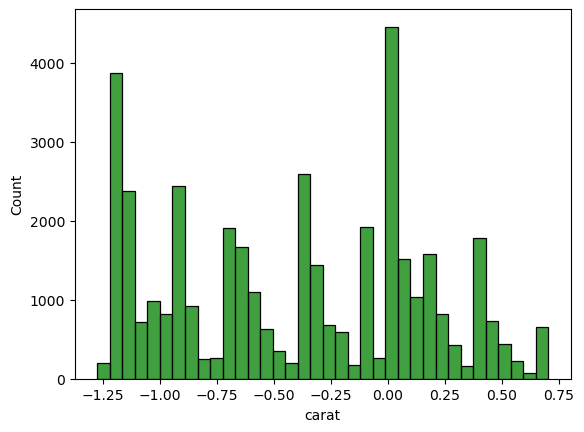

In [35]:
sns.histplot(data = X,x = 'carat',color = 'green') # что то получше по идее

используем для неорпеделенных значений метод KNNImputer который позволяет с помощью соседа вставить нужное значение вместо нан

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.impute import KNNImputer
zam = KNNImputer(n_neighbors=1, weights="uniform")

X_train = zam.fit_transform(X_train)
X_test = zam.transform(X_test)

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

from sklearn.preprocessing import StandardScaler
absss = StandardScaler()

X_train = absss.fit_transform(X_train)
X_test = absss.transform(X_test)

не знаю на сколько рабочий но точно ускоряющий обучение способ с помощью лассо регрессии убрать ненужные признаки 

In [37]:
from sklearn.linear_model import Lasso
obych = Lasso(alpha=0.0001)
obych.fit(X_train,y_train)
y_pred = obych.predict(X_test)

E:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.290e+01, tolerance: 3.007e+00
  model = cd_fast.enet_coordinate_descent(


In [38]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(np.exp(y_test), np.exp(abs(y_pred))) # приводим цену к нормальным значениям

305.46342542952345

In [39]:
X_train = (X_train.T[obych.coef_ != 0]).T
X_test =  (X_test.T[obych.coef_ != 0]).T

In [40]:
from sklearn.linear_model import ElasticNet # эластичная модель использующая л1 и л2 регуляризации
param_grid = {'alpha':[0.0001],
              'l1_ratio':[0.99]}
obych1 = ElasticNet()

In [41]:
from sklearn.model_selection import GridSearchCV 
grid_model = GridSearchCV(estimator=obych1,
                          param_grid=param_grid,
                          cv=6)

In [42]:
grid_model.fit(X_train,y_train)
y_pred = grid_model.predict(X_test)

E:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.821e+01, tolerance: 2.497e+00
  model = cd_fast.enet_coordinate_descent(
E:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.643e+01, tolerance: 2.507e+00
  model = cd_fast.enet_coordinate_descent(
E:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.334e+01, tolerance: 2.503e+00
  model = cd_fast.enet_

In [43]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(np.exp(y_test),np.exp(abs(y_pred)))

305.4109052153171

у меня сильно отличалась ошибка тут и на кагле поэтому пришла идея посмотреть на график предсказания и точного значения

<AxesSubplot:xlabel='price', ylabel='Density'>

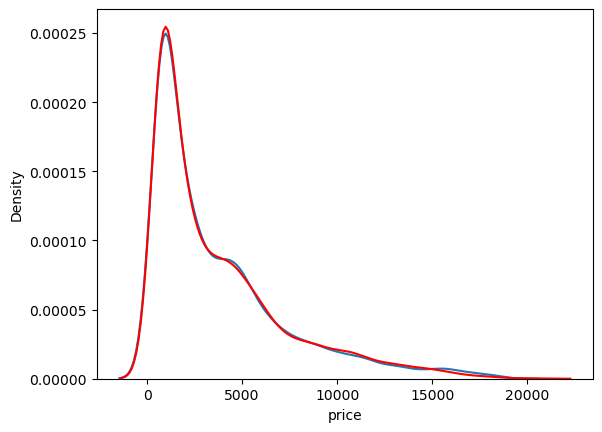

In [44]:
sns.kdeplot(np.exp(y_test))
sns.kdeplot(np.exp(y_pred),color = 'red') # тут не особо видно где больше всего ошибается модель

(5e-05, 0.00025)

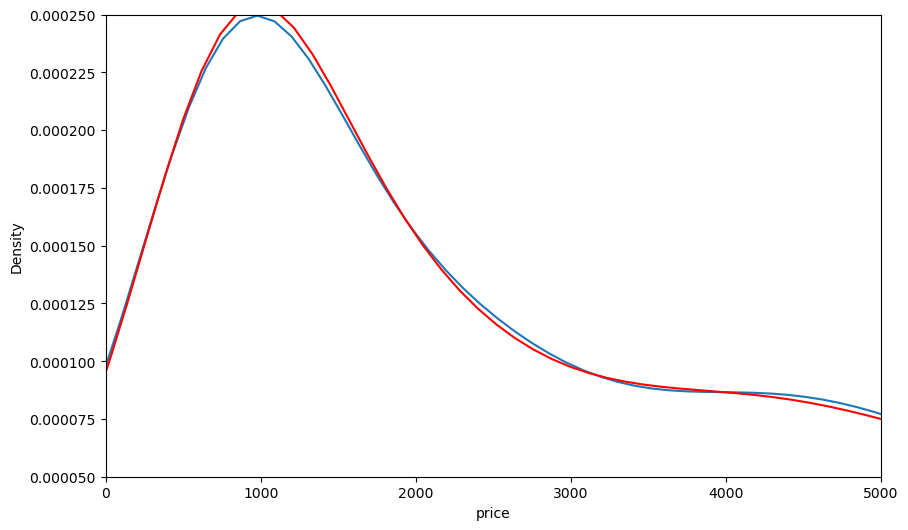

In [45]:
fig, ax = plt.subplots(figsize=(10,6))
sns.kdeplot(np.exp(y_test))
sns.kdeplot(np.exp(y_pred),color = 'red')
ax.set_xlim([0, 5000])
ax.set_ylim([0.00005, 0.00025])

(0.0, 5e-05)

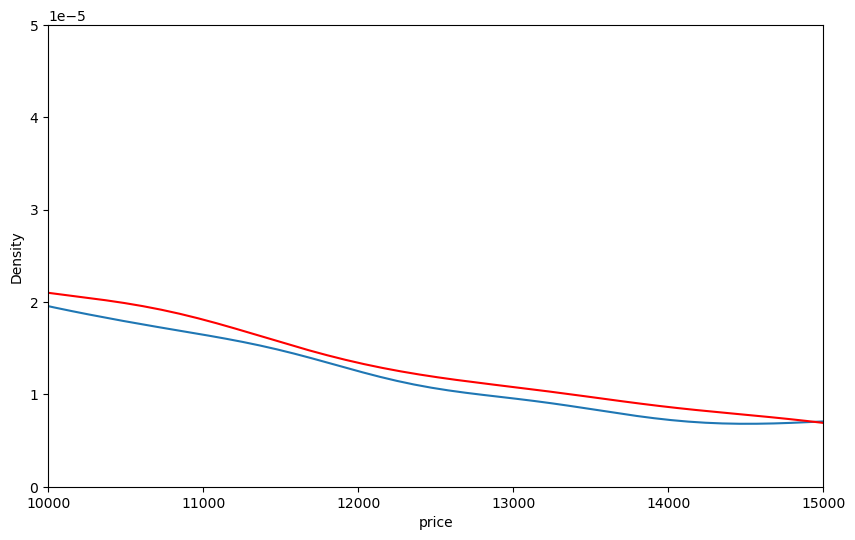

In [46]:
fig, ax = plt.subplots(figsize=(10,6))
sns.kdeplot(np.exp(y_test))
sns.kdeplot(np.exp(y_pred),color = 'red')
ax.set_xlim([10000, 15000])
ax.set_ylim([0, 0.00005])

ошибается везде почучуть 

Еще я использовал линейную версию метода опорных векторов, но я потерял этот ноутбук( 

# 3 эксперимент завершение для вас, но не для меня

Он начался с большого анализа различных данных которые ни к чему не привели (он будет в конце дабы не портить итоговую ошибку чтобы было видно что все честно и прозрачно)

In [47]:
#import numpy as np
#import pandas as pd
#import seaborn as sns
#import matplotlib.pyplot as plt

Тут я попытался использовать эту библиотеку imbalanced-learn а потом понял что это для задач улассификации но ничего как раз второй контест для этого 

Но забыл взять экспоненту из предсказанного значения один раз я понял что данные в тесте несколько отличаются потому что ошибка была больше 4000 тысяч следственно данные больше чем обучающие поэтому изначально я полез анализировать, а потом как понял что можно создать пару бинарных признаков которые будут отличать высокая цена или нет и дадут какой нибудь штраф или надбавку. Вообще это был запасной план если основной не сработает.

In [48]:
df = X13
df['prime1_6'] = np.where(((df.carat > 1.3)),1,0)
df['prime1_61'] = np.where(((df.carat > 1.7)),-1,0)
df['prime1_62'] = np.where(((df.carat > 0.6)),-1,0)

In [49]:
X = df
y = np.log(y13)
X.carat = np.log(X.carat)
X.x = np.log(X.x)
X.y = np.log(X.y)
X.z = np.log(X.z)

In [50]:
X

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,prime1_6,prime1_61,prime1_62
0,-1.272966,61.6,55.0,1.439835,1.449269,0.959350,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,-1.272966,62.5,54.0,1.430311,1.442202,0.966984,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,-1.272966,63.0,59.0,1.413423,1.423108,0.955511,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,-1.272966,62.4,54.0,1.430311,1.432701,0.959350,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5,-1.272966,60.4,59.0,1.439835,1.449269,0.940007,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40448,0.703098,62.0,59.0,2.086914,2.089392,1.609438,0,0,0,1,...,0,0,0,0,1,0,0,1,-1,-1
40449,0.703098,59.3,60.0,2.113843,2.121063,1.595339,0,0,0,0,...,0,0,0,0,1,0,0,1,-1,-1
40450,0.703098,60.4,58.0,2.104134,2.099244,1.597365,0,0,0,0,...,0,1,0,0,0,0,0,1,-1,-1
40451,0.703098,59.0,61.0,2.111425,2.117460,1.587192,0,1,0,0,...,0,0,1,0,0,0,0,1,-1,-1


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02,random_state=42)

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

from sklearn.preprocessing import StandardScaler
absss = StandardScaler()

X_train = absss.fit_transform(X_train)
X_test = absss.transform(X_test)

In [52]:
from sklearn.linear_model import Lasso
obych = Lasso(alpha=0.0001)
obych.fit(X_train,y_train)
y_pred = obych.predict(X_test)

E:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.951e+01, tolerance: 3.685e+00
  model = cd_fast.enet_coordinate_descent(


In [53]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(np.exp(y_test),np.exp(abs(y_pred)))

313.5342125016869

In [54]:
X_train = (X_train.T[obych.coef_ != 0]).T
X_test =  (X_test.T[obych.coef_ != 0]).T

In [55]:
from sklearn.linear_model import ElasticNet
param_grid = {'alpha':[0.0001],
              'l1_ratio':[0.99]}
obych1 = ElasticNet()

In [56]:
from sklearn.model_selection import GridSearchCV
grid_model = GridSearchCV(estimator=obych1,
                          param_grid=param_grid,
                          cv=2)

In [57]:
grid_model.fit(X_train,y_train)
y_pred = grid_model.predict(X_test)

E:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.383e+01, tolerance: 1.829e+00
  model = cd_fast.enet_coordinate_descent(
E:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.880e+01, tolerance: 1.856e+00
  model = cd_fast.enet_coordinate_descent(
E:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.557e+01, tolerance: 3.685e+00
  model = cd_fast.enet_

In [58]:
from sklearn.metrics import mean_absolute_error
#mean_absolute_error(y_test,abs(y_pred))
mean_absolute_error(np.exp(y_test),np.exp(abs(y_pred)))

313.94479078973114

<AxesSubplot:xlabel='price', ylabel='Density'>

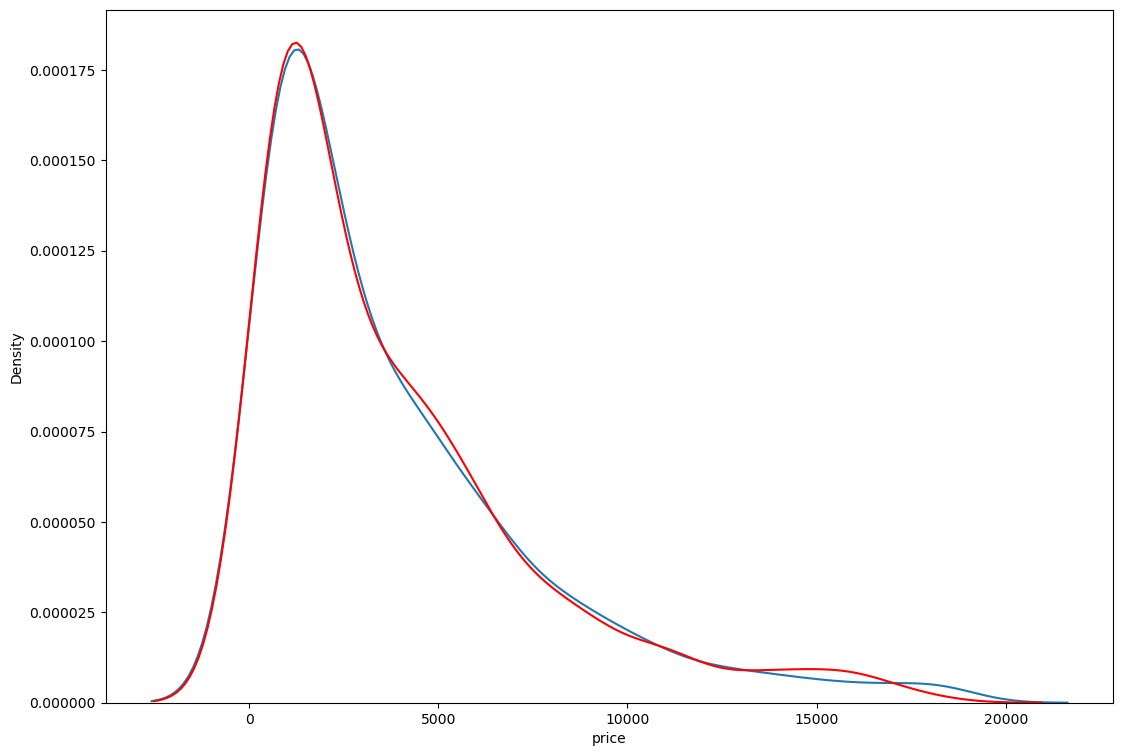

In [59]:
plt.figure(figsize=(13,9))
sns.kdeplot(np.exp(y_test))
sns.kdeplot(np.exp(y_pred),color = 'red')

In [60]:
df22 = pd.read_csv('test.csv')
result = df22[['id']]

In [61]:
df22 = pd.get_dummies(df22,drop_first=True)

In [62]:
X = df22.drop(['id','theta1','theta2'],axis = 1)
X

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.24,61.3,56.0,6.90,6.93,4.24,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
1,0.31,62.1,54.0,4.37,4.33,2.70,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0.39,61.7,62.0,4.65,4.69,2.88,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.61,61.1,57.0,5.46,5.49,3.34,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4,0.31,63.2,55.0,4.31,4.33,2.73,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13482,4.01,62.5,62.0,10.02,9.94,6.24,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
13483,4.01,61.0,61.0,10.14,10.10,6.17,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
13484,4.13,64.8,61.0,10.00,9.85,6.43,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
13485,4.50,65.8,58.0,10.23,10.16,6.72,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [63]:
X.x = X.x.replace(0,np.mean(X.x))
X.y = X.y.replace(0,np.mean(X.y))
X.z = X.z.replace(0,np.mean(X.z))

In [64]:
X['prime1_6'] = np.where(((X.carat > 1.3)),1,0)
X['prime1_61'] = np.where(((X.carat > 1.7)),-1,0)
X['prime1_62'] = np.where(((X.carat > 0.6)),-1,0)

In [65]:
X.carat = np.log(X.carat)
X.x = np.log(X.x)
X.y = np.log(X.y)
X.z = np.log(X.z)

In [66]:
poly.transform(X)

array([[ 1.        ,  0.21511138, 61.3       , ..., -0.        ,
         0.        , -1.        ],
       [ 1.        , -1.17118298, 62.1       , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.94160854, 61.7       , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.        ,  1.41827741, 64.8       , ..., -1.        ,
        -1.        , -1.        ],
       [ 1.        ,  1.5040774 , 65.8       , ..., -1.        ,
        -1.        , -1.        ],
       [ 1.        ,  1.61143592, 65.5       , ..., -1.        ,
        -1.        , -1.        ]])

In [67]:
dataset2 = poly.transform(X)
dataset2 = absss.transform(dataset2)
dataset2 = (dataset2.T[obych.coef_ != 0]).T

In [68]:
y_pred1 = grid_model.predict(dataset2)

In [69]:
result.loc[:, ['price']] = np.exp(y_pred1) # сохраняем все в csv файл
result.to_csv("yapredict.csv", index = False)

In [70]:
np.exp(y_pred1)

array([ 5766.42134848,   799.32799407,   874.20106519, ...,
       14142.90597305, 14646.46888325, 14015.61778171])

### Conclusion (Выводы)

В этом разделе описываете полученные результаты и проводите анализ выполненной работы. 
Что получилось / не получилось и почему?

Получилось познакомиться пощупать разные методы ручками что основное крутой соревновательный элемент но у меня что то пошло не так. А теперь то что не получилось 

In [101]:
df1 = pd.read_csv('train.csv')
df1 

,id,carat,cut,color,clarity,depth,table,x,y,z,theta1,theta2,price
0,17044,0.28,Ideal,F,VVS2,61.6,55.0,4.22,4.26,2.61,5,5,612
1,30625,0.28,Ideal,I,VS1,62.5,54.0,4.18,4.23,2.63,5,6,448
2,17043,0.28,'Very Good',F,IF,62.2,55.0,4.23,4.26,NaN,5,7,612
3,37947,0.28,'Very Good',E,VS2,63.0,59.0,4.11,4.15,2.60,5,8,487
4,30626,0.28,Ideal,I,VS1,62.4,54.0,4.18,4.19,2.61,5,9,448
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40448,25132,2.02,Premium,J,VS2,62.0,59.0,8.06,8.08,5.00,27,23,13687
40449,25135,2.02,'Very Good',J,VS2,59.3,60.0,8.28,8.34,4.93,27,24,13693
40450,27141,2.02,'Very Good',I,SI1,60.4,58.0,8.20,8.16,4.94,27,25,17357
40451,24778,2.02,Good,H,SI2,59.0,61.0,8.26,8.31,4.89,27,27,13144


In [108]:
df12 = df1[(df1.carat>0.99) & (df1.carat<1.01)]

In [109]:
df12

,id,carat,cut,color,clarity,depth,table,x,y,z,theta1,theta2,price
26499,7004,1.0,Premium,F,SI2,62.4,61.0,6.34,6.32,3.95,27,27,4155
26500,7001,1.0,Good,I,VS2,59.7,64.0,6.51,6.45,3.87,27,29,4155
26501,13421,1.0,'Very Good',G,SI1,62.3,62.0,6.34,6.38,3.96,27,30,5511
26502,7002,1.0,Good,D,SI1,57.6,62.0,6.62,6.50,3.78,27,31,4155
26503,11586,1.0,Premium,E,SI1,61.2,58.0,6.39,6.35,3.90,27,32,5040
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27710,8328,1.0,'Very Good',E,SI2,62.5,55.0,6.38,6.41,4.00,21,11,4392
27711,6636,1.0,'Very Good',I,SI1,63.2,56.0,6.37,6.31,4.01,21,12,4088
27712,10302,1.0,Ideal,E,SI2,61.9,56.0,6.43,6.40,3.97,21,20,4760
27713,6635,1.0,Premium,H,SI2,63.0,61.0,6.35,6.31,3.99,21,21,4088


<AxesSubplot:xlabel='cut', ylabel='price'>

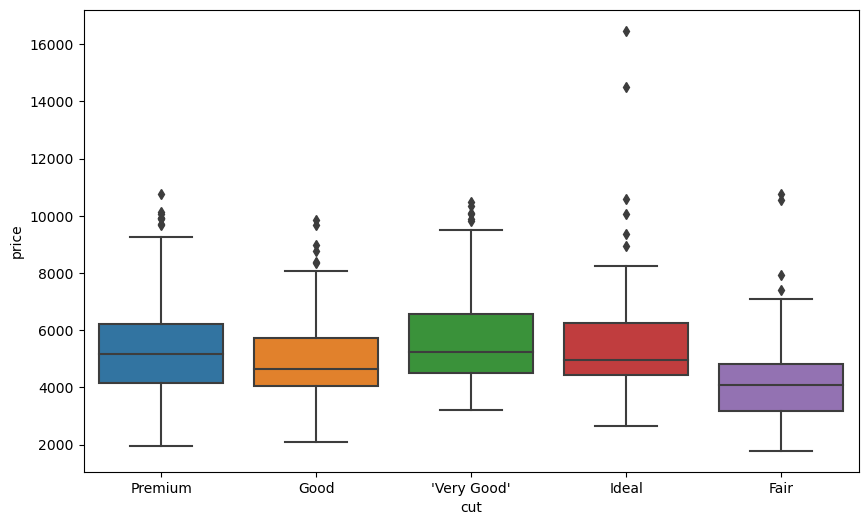

In [110]:
plt.figure(figsize=(10,6))
sns.boxplot(x = df12.cut,y = df12.price) # заметим что при одинаковом размере Fair сильно дешевле остальных

<AxesSubplot:xlabel='color', ylabel='price'>

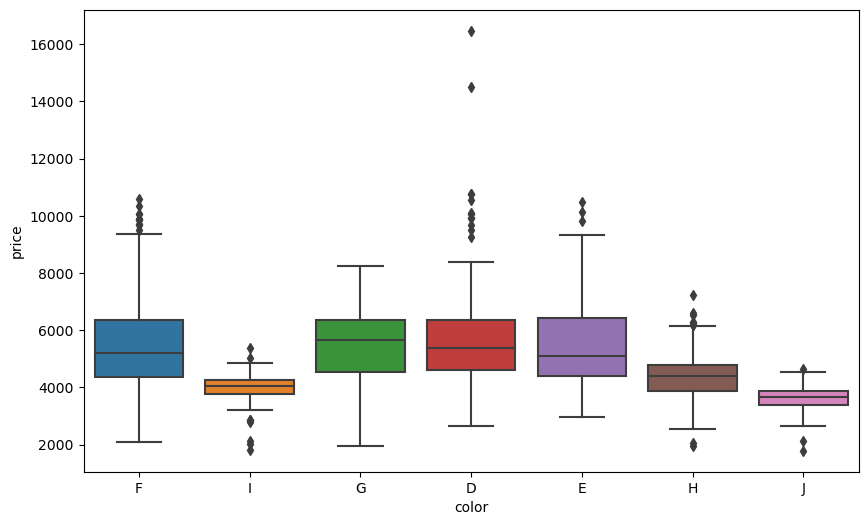

In [111]:
plt.figure(figsize=(10,6))
sns.boxplot(x = df12.color,y = df12.price)  # у цветов тоже достаточно сильнавя зависимость 

<AxesSubplot:xlabel='clarity', ylabel='price'>

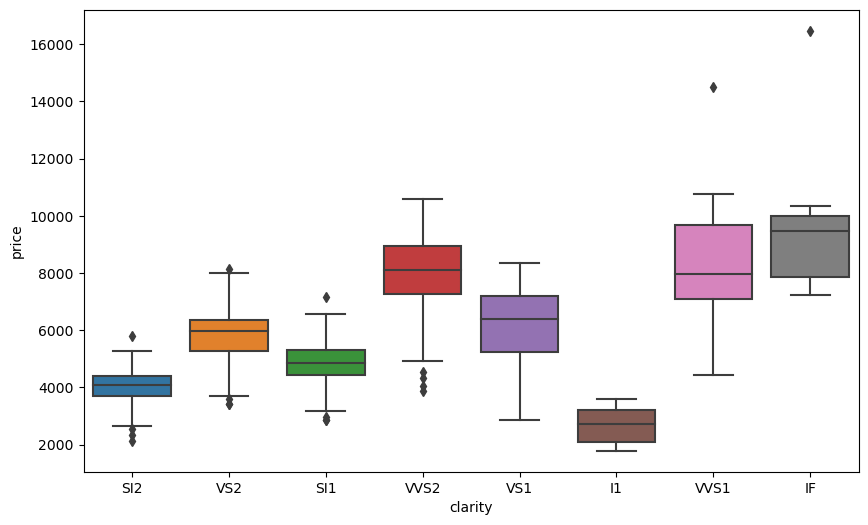

In [112]:
plt.figure(figsize=(10,6))
sns.boxplot(x = df12.clarity,y = df12.price)
# у clarity самая сильная зависимость стоимость при одном размере может быть практически в два раза больше 

<AxesSubplot:xlabel='clarity', ylabel='price'>

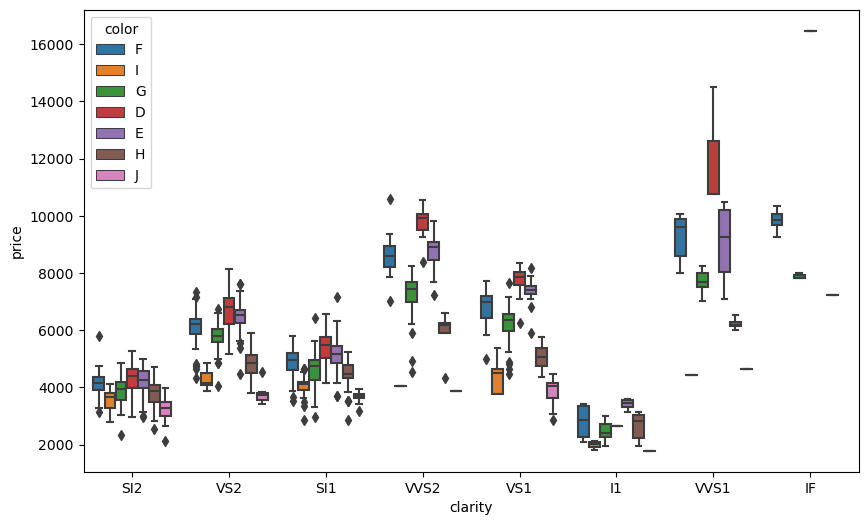

In [113]:
plt.figure(figsize=(10,6))
sns.boxplot(x = df12.clarity,y = df12.price, hue = df12.color)
# выборка хоть и не большая но наглядно видно что есть определенное качество которое сильно дороже 

Поэтому была идея написать прогрмаау которая будет по скорелированному критерия и boxploty помогать линейной регресии новыми параметрами.

<AxesSubplot:xlabel='carat', ylabel='price'>

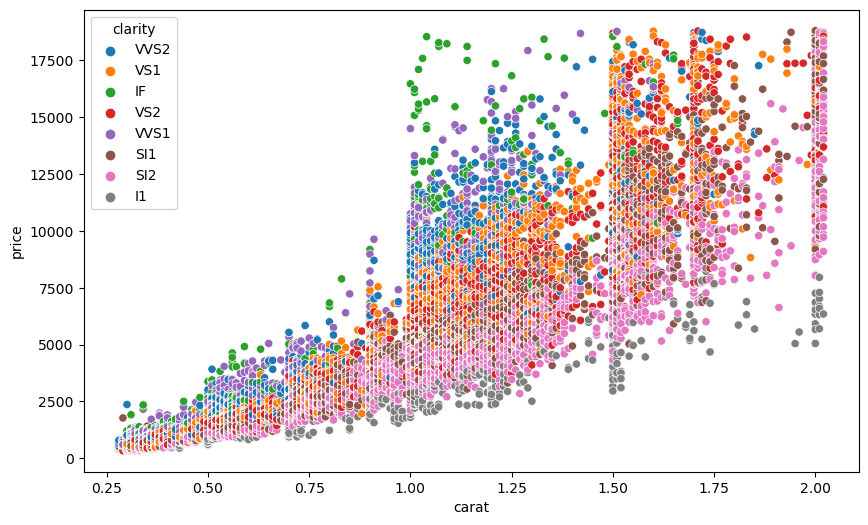

In [120]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = df1.carat, y = df1.price ,hue = df1.clarity) # видно переливание цветов от дорогого к дешевому 

(0.25, 1.0)

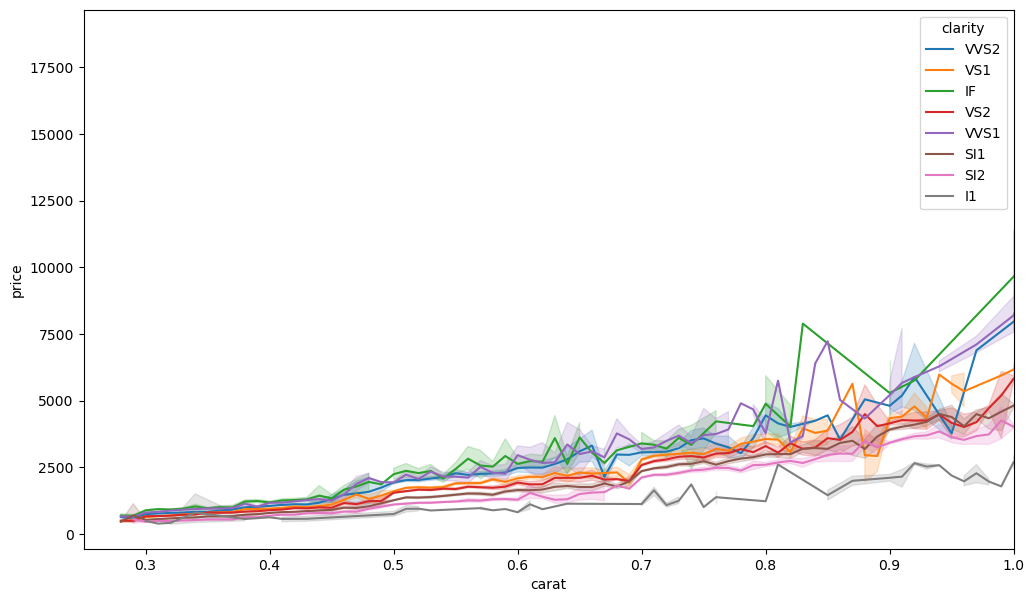

In [123]:
fig, ax = plt.subplots(figsize=(12,7))
sns.lineplot(x = df1.carat, y = df1.price ,hue = df1.clarity)
ax.set_xlim([0.25, 1]) # тоже видно разницу 